### 训练YOLO5模型识别数字

基本的配置已经在0622_yolov5-custom_training_basedonTutorial中设置好
此处用于反复调整及训练


In [ ]:
#mount drive
%cd ..
from google.colab import drive
drive.mount('/content/gdrive')

/
Mounted at /content/gdrive


In [ ]:
%cd /content/gdrive/MyDrive/yolo5/

/content/gdrive/MyDrive/yolo5


In [ ]:
import torch
from IPython.display import Image, clear_output  # to display images

### fix error 
https://github.com/ultralytics/yolov5/issues/414

In [ ]:
%cd /content/gdrive/MyDrive/yolo5/

/content/gdrive/MyDrive/yolo5


In [ ]:
!pip install PyYAML==5.4.1

     |████████████████████████████████| 636 kB 12.5 MB/s 
  Attempting uninstall: PyYAML
    Found existing installation: PyYAML 3.13
    Uninstalling PyYAML-3.13:
      Successfully uninstalled PyYAML-3.13


## training

In [ ]:
pip install wandb

     |████████████████████████████████| 1.6 MB 12.3 MB/s 
     |████████████████████████████████| 170 kB 53.8 MB/s 
     |████████████████████████████████| 133 kB 50.3 MB/s 
     |████████████████████████████████| 97 kB 6.8 MB/s 
     |████████████████████████████████| 63 kB 1.7 MB/s 
  Created wheel for subprocess32: filename=subprocess32-3.5.4-py3-none-any.whl size=6502 sha256=7961b549547b38bc82b66a4871049a4d994dfa6af5d411b408bd2c4ee24437f9
  Stored in directory: /root/.cache/pip/wheels/50/ca/fa/8fca8d246e64f19488d07567547ddec8eb084e8c0d7a59226a
  Created wheel for pathtools: filename=pathtools-0.1.2-py3-none-any.whl size=8807 sha256=708abc84acecc866e1abc6f8e39261438ca4d6d36a2b7c76892535747ba86daa
  Stored in directory: /root/.cache/pip/wheels/3e/31/09/fa59cef12cdcfecc627b3d24273699f390e71828921b2cbba2
Successfully built subprocess32 pathtools


In [ ]:
%cd /content/gdrive/MyDrive/yolo5/

/content/gdrive/MyDrive/yolo5


### 训练数字识别训练

default batch size is 16 
[16, 20, 32, 40, 64, 80, 96, 128]
because of the counter images are small, we increase the batch size

In [ ]:
freeze = ['model.%s.' % x for x in range(10)]  # parameter names to freeze (full or partial)

## model3_1

In [ ]:
# Train yolov5x on score for 300 epochs
# cd /content/gdrive/MyDrive/yolo5/yolov5

#!python3 train.py --hyp ./data/hyp_digit.yaml  --img-size 640 --batch-size 16 --epochs 300 --data ./data/digit.yaml --cfg ./models/digit/yolov5s.yaml --weights weights/yolov5s.pt
#!python3 yolov5/train.py --hyp digit/hyp_digit.yaml  --data digit/digit.yaml --batch-size 64 --cfg digit/yolov5m.yaml --weights yolov5/weights/yolov5m.pt --img-size 256 --epochs 150
# img-size 32 times
#!python3 yolov5/train.py --hyp digit/hyp_digit_single.yaml  --data digit/digit.yaml --batch-size 64 --cfg digit/yolov5m.yaml --weights yolov5/weights/yolov5m.pt --img-size 50 --epochs 300
#!python3 yolov5/train.py --hyp digit/hyp_digit.yaml  --data digit/digit.yaml --batch-size 64 --cfg digit/yolov5m.yaml --weights yolov5/weights/yolov5m.pt --img-size 64 --epochs 300
#!python3 yolov5/train.py --hyp digit/hyp_digit.yaml  --data digit/digit.yaml --batch-size 64 --cfg digit/yolov5m.yaml --weights yolov5/weights/yolov5m.pt --img-size 96 --epochs 300

!python3 yolov5/train.py --hyp digit/hyp_digit.yaml  --data digit/digit.yaml --batch-size 64 --cfg digit/yolov5m.yaml --weights yolov5/weights/yolov5m.pt --img-size 96 --epochs 300

train: weights=yolov5/weights/yolov5m.pt, cfg=digit/yolov5m.yaml, data=digit/digit.yaml, hyp=digit/hyp_digit.yaml, epochs=300, batch_size=64, img_size=[96], rect=False, resume=False, nosave=False, notest=False, noautoanchor=False, evolve=False, bucket=, cache_images=False, image_weights=False, device=, multi_scale=False, single_cls=False, adam=False, sync_bn=False, workers=8, project=runs/train, entity=None, name=exp, exist_ok=False, quad=False, linear_lr=False, label_smoothing=0.0, upload_dataset=False, bbox_interval=-1, save_period=-1, artifact_alias=latest, local_rank=-1
github: skipping check (not a git repository), for updates see https://github.com/ultralytics/yolov5
requirements: /content/gdrive/My Drive/yolo5/requirements.txt not found, check failed.
YOLOv5 🚀 2021-6-22 torch 1.9.0+cu102 CUDA:0 (Tesla K80, 11441.1875MB)

hyperparameters: lr0=0.01, lrf=0.2, momentum=0.937, weight_decay=0.0005, warmup_epochs=3.0, warmup_momentum=0.8, warmup_bias_lr=0.1, box=0.05, cls=0.5, cls_pw=1

In [ ]:
!python3 yolov5/train.py --resume /content/gdrive/MyDrive/yolo5/runs/train/exp98/weights/last.pt
#wandb-artifact://rachelwang/YOLOv5/36pg4xl0

train: weights=yolov5s.pt, cfg=, data=data/coco128.yaml, hyp=data/hyp.scratch.yaml, epochs=300, batch_size=16, img_size=[640, 640], rect=False, resume=/content/gdrive/MyDrive/yolo5/runs/train/exp98/weights/last.pt, nosave=False, notest=False, noautoanchor=False, evolve=False, bucket=, cache_images=False, image_weights=False, device=, multi_scale=False, single_cls=False, adam=False, sync_bn=False, workers=8, project=runs/train, entity=None, name=exp, exist_ok=False, quad=False, linear_lr=False, label_smoothing=0.0, upload_dataset=False, bbox_interval=-1, save_period=-1, artifact_alias=latest, local_rank=-1
github: skipping check (not a git repository), for updates see https://github.com/ultralytics/yolov5
requirements: /content/gdrive/MyDrive/yolo5/requirements.txt not found, check failed.
Resuming training from /content/gdrive/MyDrive/yolo5/runs/train/exp98/weights/last.pt
YOLOv5 🚀 v5.0-226-g6306091 torch 1.9.0+cu102 CUDA:0 (Tesla K80, 11441.1875MB)

hyperparameters: lr0=0.01, lrf=0.2,

In [ ]:
!python3 yolov5/train.py --hyp digit/hyp_digit.yaml  --data digit/digit.yaml --batch-size 32 --cfg digit/yolov5m.yaml --weights yolov5/weights/yolov5m.pt --img-size 300 --epochs 200

### 测试模型性能

In [ ]:
!python3 yolov5/test.py  --data digit/digit.yaml --weights runs/train/exp98/weights/best.pt --augment --imgsz 192 --conf-thre 0.55

test: data=digit/digit.yaml, weights=['runs/train/exp98/weights/best.pt'], batch_size=32, imgsz=192, conf_thres=0.55, iou_thres=0.6, task=val, device=, single_cls=False, augment=True, verbose=False, save_txt=False, save_hybrid=False, save_conf=False, save_json=False, project=runs/test, name=exp, exist_ok=False, half=False
requirements: /content/gdrive/My Drive/yolo5/requirements.txt not found, check failed.
YOLOv5 🚀 2021-6-22 torch 1.9.0+cu102 CUDA:0 (Tesla K80, 11441.1875MB)

Fusing layers... 
Model Summary: 308 layers, 21074007 parameters, 0 gradients
/usr/local/lib/python3.7/dist-packages/torch/nn/functional.py:718: UserWarning: Named tensors and all their associated APIs are an experimental feature and subject to change. Please do not use them for anything important until they are released as stable. (Triggered internally at  /pytorch/c10/core/TensorImpl.h:1156.)
  return torch.max_pool2d(input, kernel_size, stride, padding, dilation, ceil_mode)
val: Scanning 'digit/datasets/labels

In [ ]:
#!python3 yolov5/test.py  --data digit/digit.yaml --weights runs/train/exp83/weights/best.pt --augment
#!python3 yolov5/test.py  --data digit/digit.yaml --weights runs/train/exp88/weights/best.pt --augment
#!python3 yolov5/test.py  --data digit/digit.yaml --weights runs/train/exp89/weights/best.pt --augment
#!python3 yolov5/test.py  --data digit/digit.yaml --weights runs/train/exp90/weights/best.pt --augment --imgsz 192
#!python3 yolov5/test.py  --data digit/digit.yaml --weights runs/train/exp92/weights/best.pt --augment
#!python3 yolov5/test.py  --data digit/digit.yaml --weights runs/train/exp92/weights/best.pt --augment --imgsz 192 --conf-thre 0.55
#!python3 yolov5/test.py  --data digit/digit.yaml --weights runs/train/exp88/weights/best.pt --augment --imgsz 192 #--conf-thre 0.55

#!python3 yolov5/test.py  --data digit/digit.yaml --weights runs/train/exp89/weights/best.pt --augment --imgsz 192 #--conf-thre 0.55

# exp55 is trained on bad few samples augmented data, dropped
#!python3 yolov5/test.py  --data digit/digit.yaml --weights runs/train/exp55/weights/best.pt --augment --imgsz 192 #--conf-thre 0.55
#!python3 yolov5/test.py  --data digit/digit.yaml --weights runs/train/exp88/weights/best.pt --augment --imgsz 192 --conf-thre 0.55

!python3 yolov5/test.py  --data digit/digit.yaml --weights runs/train/exp95/weights/best.pt --augment --imgsz 192 --conf-thre 0.55

test: data=digit/digit.yaml, weights=['runs/train/exp95/weights/best.pt'], batch_size=32, imgsz=192, conf_thres=0.55, iou_thres=0.6, task=val, device=, single_cls=False, augment=True, verbose=False, save_txt=False, save_hybrid=False, save_conf=False, save_json=False, project=runs/test, name=exp, exist_ok=False, half=False
requirements: /content/gdrive/My Drive/yolo5/requirements.txt not found, check failed.
YOLOv5 🚀 2021-6-22 torch 1.9.0+cu102 CUDA:0 (Tesla K80, 11441.1875MB)

Fusing layers... 
Model Summary: 308 layers, 21074007 parameters, 0 gradients
/usr/local/lib/python3.7/dist-packages/torch/nn/functional.py:718: UserWarning: Named tensors and all their associated APIs are an experimental feature and subject to change. Please do not use them for anything important until they are released as stable. (Triggered internally at  /pytorch/c10/core/TensorImpl.h:1156.)
  return torch.max_pool2d(input, kernel_size, stride, padding, dilation, ceil_mode)
val: Scanning 'digit/datasets/labels

In [ ]:
#!python3 yolov5/test.py  --data digit/digit.yaml --weights runs/train/exp83/weights/best.pt --augment
#!python3 yolov5/test.py  --data digit/digit.yaml --weights runs/train/exp87/weights/best.pt --augment 
#!python3 yolov5/test.py  --data digit/digit.yaml --weights runs/train/exp90/weights/best.pt --augment 
#!python3 yolov5/test.py  --data digit/digit.yaml --weights runs/train/exp92/weights/best.pt --augment 

#!python3 yolov5/test.py  --data digit/digit.yaml --weights runs/train/exp94/weights/best.pt --augment 
!python3 yolov5/test.py  --data digit/digit.yaml --weights runs/train/exp88/weights/best.pt --augment 

python3: can't open file 'yolov5/test.py': [Errno 2] No such file or directory


### 验证数字识别模型。分别用数字显示区域和煤气表原图验证

In [ ]:
%cd /content/gdrive/MyDrive/yolo5/

[Errno 2] No such file or directory: '/content/gdrive/MyDrive/yolo5/'
/content


In [ ]:
#!python yolov5/detect.py --weights runs/train/exp83/weights/best.pt  --source /content/gdrive/MyDrive/yolo5/digit/internet --save-txt  --save-crop --project /content/gdrive/MyDrive/yolo5/digit/result --conf-thres 0.5

#!python yolov5/detect.py --weights runs/train/exp89/weights/best.pt  --source /content/gdrive/MyDrive/yolo5/digit/internet --save-txt  --save-crop --project /content/gdrive/MyDrive/yolo5/digit/result --conf-thres 0.5
#!python yolov5/detect.py --weights runs/train/exp90/weights/best.pt  --source /content/gdrive/MyDrive/yolo5/digit/internet --save-txt  --save-crop --project /content/gdrive/MyDrive/yolo5/digit/result 
#!python yolov5/detect.py --weights runs/train/exp90/weights/best.pt  --source /content/gdrive/MyDrive/yolo5/digit/internet --save-txt  --save-crop --project /content/gdrive/MyDrive/yolo5/digit/result 
!python yolov5/detect.py --weights runs/train/exp57/weights/best.pt  --source /content/gdrive/MyDrive/model57_data/raw_model57 --save-txt  --save-crop --project /content/gdrive/MyDrive/yolo5/digit/result 
#--conf-thres 0.5

detect: weights=['runs/train/exp57/weights/best.pt'], source=/content/gdrive/MyDrive/model57_data/raw_model57, imgsz=640, conf_thres=0.25, iou_thres=0.45, max_det=1000, device=, view_img=False, save_txt=True, save_conf=False, save_crop=True, nosave=False, classes=None, agnostic_nms=False, augment=False, update=False, project=/content/gdrive/MyDrive/yolo5/digit/result, name=exp, exist_ok=False, line_thickness=3, hide_labels=False, hide_conf=False, half=False
requirements: /content/gdrive/MyDrive/yolo5/requirements.txt not found, check failed.
YOLOv5 🚀 v5.0-226-g6306091 torch 1.9.0+cu102 CPU

Fusing layers... 
Model Summary: 224 layers, 7080880 parameters, 0 gradients
/usr/local/lib/python3.7/dist-packages/torch/nn/functional.py:718: UserWarning: Named tensors and all their associated APIs are an experimental feature and subject to change. Please do not use them for anything important until they are released as stable. (Triggered internally at  /pytorch/c10/core/TensorImpl.h:1156.)
  ret

In [ ]:
!zip -r /content/gdrive/MyDrive/yolo5/digit/result/digit_detect_model57_exp29.zip /content/gdrive/MyDrive/yolo5/digit/result/exp29/*

  adding: content/gdrive/MyDrive/yolo5/digit/result/exp29/0165984_c16.jpg (deflated 4%)
  adding: content/gdrive/MyDrive/yolo5/digit/result/exp29/0167892_858.jpg (deflated 5%)
  adding: content/gdrive/MyDrive/yolo5/digit/result/exp29/0169287_0dc.jpg (deflated 5%)
  adding: content/gdrive/MyDrive/yolo5/digit/result/exp29/0185269_7b5.jpg (deflated 5%)
  adding: content/gdrive/MyDrive/yolo5/digit/result/exp29/0256934_0c3.jpg (deflated 5%)
  adding: content/gdrive/MyDrive/yolo5/digit/result/exp29/0258176_b11.jpg (deflated 4%)
  adding: content/gdrive/MyDrive/yolo5/digit/result/exp29/0421589_e4a.jpg (deflated 4%)
  adding: content/gdrive/MyDrive/yolo5/digit/result/exp29/0469813_887.jpg (deflated 4%)
  adding: content/gdrive/MyDrive/yolo5/digit/result/exp29/0561324_7ee.jpg (deflated 5%)
  adding: content/gdrive/MyDrive/yolo5/digit/result/exp29/0641723_f26.jpg (deflated 5%)
  adding: content/gdrive/MyDrive/yolo5/digit/result/exp29/0652791_2b2.jpg (deflated 4%)
  adding: content/gdrive/MyDrive

In [ ]:
#!python yolov5/detect.py --weights runs/train/exp88/weights/best.pt  --source /content/gdrive/MyDrive/testimages/exp/crops/ArteMeter --save-txt  --save-crop --project /content/gdrive/MyDrive/testimages --conf-thres 0.4 --line-thickness 1 
#!python yolov5/detect.py --weights runs/train/exp89/weights/best.pt  --source /content/gdrive/MyDrive/testimages/exp/crops/ArteMeter --save-txt  --save-crop --project /content/gdrive/MyDrive/testimages --conf-thres 0.5 --line-thickness 1 
#!python yolov5/detect.py --weights runs/train/exp90/weights/best.pt  --source /content/gdrive/MyDrive/testimages/exp/crops/ArteMeter --save-txt  --save-crop --project /content/gdrive/MyDrive/testimages --conf-thres 0.5 --line-thickness 1 
#!python yolov5/detect.py --weights runs/train/exp92/weights/best.pt  --source /content/gdrive/MyDrive/testimages/exp/crops/ArteMeter --save-txt  --save-crop --project /content/gdrive/MyDrive/testimages --conf-thres 0.6 --line-thickness 1 

#!python yolov5/detect.py --weights runs/train/exp92/weights/best.pt  --source /content/gdrive/MyDrive/testimages/exp/crops/ArteMeter --save-txt  --save-crop --project /content/gdrive/MyDrive/testimages --conf-thres 0.6 --line-thickness 1 
!python yolov5/detect.py --weights runs/train/exp57/weights/best.pt  --source /content/gdrive/MyDrive/testimages/exp/crops/ArteMeter --save-txt  --save-crop --project /content/gdrive/MyDrive/testimages --conf-thres 0.6 --line-thickness 1 

detect: weights=['runs/train/exp57/weights/best.pt'], source=/content/gdrive/MyDrive/testimages/exp/crops/ArteMeter, imgsz=640, conf_thres=0.6, iou_thres=0.45, max_det=1000, device=, view_img=False, save_txt=True, save_conf=False, save_crop=True, nosave=False, classes=None, agnostic_nms=False, augment=False, update=False, project=/content/gdrive/MyDrive/testimages, name=exp, exist_ok=False, line_thickness=1, hide_labels=False, hide_conf=False, half=False
requirements: /content/gdrive/MyDrive/yolo5/requirements.txt not found, check failed.
YOLOv5 🚀 v5.0-226-g6306091 torch 1.9.0+cu102 CPU

Fusing layers... 
Model Summary: 224 layers, 7080880 parameters, 0 gradients
/usr/local/lib/python3.7/dist-packages/torch/nn/functional.py:718: UserWarning: Named tensors and all their associated APIs are an experimental feature and subject to change. Please do not use them for anything important until they are released as stable. (Triggered internally at  /pytorch/c10/core/TensorImpl.h:1156.)
  return

In [ ]:
!zip -r /content/gdrive/MyDrive/testimages/model57_exp14_100.zip /content/gdrive/MyDrive/testimages/exp14

  adding: content/gdrive/MyDrive/testimages/exp14/ (stored 0%)
  adding: content/gdrive/MyDrive/testimages/exp14/labels/ (stored 0%)
  adding: content/gdrive/MyDrive/testimages/exp14/labels/1.txt (deflated 50%)
  adding: content/gdrive/MyDrive/testimages/exp14/labels/10.txt (deflated 55%)
  adding: content/gdrive/MyDrive/testimages/exp14/labels/100.txt (deflated 38%)
  adding: content/gdrive/MyDrive/testimages/exp14/labels/11.txt (deflated 30%)
  adding: content/gdrive/MyDrive/testimages/exp14/labels/12.txt (deflated 46%)
  adding: content/gdrive/MyDrive/testimages/exp14/labels/13.txt (deflated 9%)
  adding: content/gdrive/MyDrive/testimages/exp14/labels/14.txt (deflated 39%)
  adding: content/gdrive/MyDrive/testimages/exp14/labels/16.txt (deflated 9%)
  adding: content/gdrive/MyDrive/testimages/exp14/labels/17.txt (deflated 52%)
  adding: content/gdrive/MyDrive/testimages/exp14/labels/18.txt (deflated 37%)
  adding: content/gdrive/MyDrive/testimages/exp14/labels/19.txt (deflated 39%)


In [ ]:
#!python yolov5/detect.py --weights runs/train/exp83/weights/best.pt  --source /content/gdrive/MyDrive/yolo5/digit/internet --save-txt  --save-crop --project /content/gdrive/MyDrive/yolo5/digit/result --conf-thres 0.6 --line-thickness 1 --imgsz 

!python yolov5/detect.py --weights runs/train/exp83/weights/best.pt  --source /content/gdrive/MyDrive/yolo5/digit/result/exp17/crops/ArteMeter --save-txt  --save-crop --project /content/gdrive/MyDrive/yolo5/digit/result --conf-thres 0.3 --line-thickness 1 


detect: weights=['runs/train/exp83/weights/best.pt'], source=/content/gdrive/MyDrive/yolo5/digit/result/exp17/crops/ArteMeter, imgsz=640, conf_thres=0.3, iou_thres=0.45, max_det=1000, device=, view_img=False, save_txt=True, save_conf=False, save_crop=True, nosave=False, classes=None, agnostic_nms=False, augment=False, update=False, project=/content/gdrive/MyDrive/yolo5/digit/result, name=exp, exist_ok=False, line_thickness=1, hide_labels=False, hide_conf=False, half=False
requirements: /content/gdrive/MyDrive/yolo5/requirements.txt not found, check failed.
YOLOv5 🚀 v5.0-226-g6306091 torch 1.9.0+cu102 CUDA:0 (Tesla T4, 15109.75MB)

Fusing layers... 
Model Summary: 308 layers, 21078048 parameters, 0 gradients
/usr/local/lib/python3.7/dist-packages/torch/nn/functional.py:718: UserWarning: Named tensors and all their associated APIs are an experimental feature and subject to change. Please do not use them for anything important until they are released as stable. (Triggered internally at  /

In [ ]:
!python yolov5/detect.py --weights runs/train/exp83/weights/best.pt  --source /content/gdrive/MyDrive/yolo5/digit/internet1 --save-txt  --save-crop --project /content/gdrive/MyDrive/yolo5/digit/result --conf-thres 0.5 --line-thickness 1 


detect: weights=['runs/train/exp83/weights/best.pt'], source=/content/gdrive/MyDrive/yolo5/digit/internet1, imgsz=640, conf_thres=0.5, iou_thres=0.45, max_det=1000, device=, view_img=False, save_txt=True, save_conf=False, save_crop=True, nosave=False, classes=None, agnostic_nms=False, augment=False, update=False, project=/content/gdrive/MyDrive/yolo5/digit/result, name=exp, exist_ok=False, line_thickness=1, hide_labels=False, hide_conf=False, half=False
requirements: /content/gdrive/My Drive/yolo5/requirements.txt not found, check failed.
YOLOv5 🚀 2021-6-22 torch 1.9.0+cu102 CUDA:0 (Tesla K80, 11441.1875MB)

Fusing layers... 
Model Summary: 308 layers, 21078048 parameters, 0 gradients
/usr/local/lib/python3.7/dist-packages/torch/nn/functional.py:718: UserWarning: Named tensors and all their associated APIs are an experimental feature and subject to change. Please do not use them for anything important until they are released as stable. (Triggered internally at  /pytorch/c10/core/Tensor

In [ ]:
!zip -r /content/gdrive/MyDrive/yolo5/digit/digit_exp23.zip /content/gdrive/MyDrive/yolo5/digit/result/exp23/*

  adding: content/gdrive/MyDrive/yolo5/digit/result/exp23/012-IMG-MED2.jpg_resized.jpg (deflated 3%)
  adding: content/gdrive/MyDrive/yolo5/digit/result/exp23/013-IMG-MED.jpg_resized.jpg (deflated 3%)
  adding: content/gdrive/MyDrive/yolo5/digit/result/exp23/014-IMG-MED.jpg_resized.jpg (deflated 3%)
  adding: content/gdrive/MyDrive/yolo5/digit/result/exp23/015-IMG-MED.jpg_resized.jpg (deflated 3%)
  adding: content/gdrive/MyDrive/yolo5/digit/result/exp23/016-IMG-MED.jpg_resized.jpg (deflated 3%)
  adding: content/gdrive/MyDrive/yolo5/digit/result/exp23/017-IMG-MED.jpg_resized.jpg (deflated 3%)
  adding: content/gdrive/MyDrive/yolo5/digit/result/exp23/018-IMG-MED.jpg_resized.jpg (deflated 3%)
  adding: content/gdrive/MyDrive/yolo5/digit/result/exp23/019-IMG-MED.jpg_resized.jpg (deflated 3%)
  adding: content/gdrive/MyDrive/yolo5/digit/result/exp23/021-IMG-MED.jpg_resized.jpg (deflated 2%)
  adding: content/gdrive/MyDrive/yolo5/digit/result/exp23/033-IMG-MED2.jpg_resized.jpg (deflated 3%

In [ ]:
# resize images
from PIL import Image
import os, sys

path = "/content/gdrive/MyDrive/yolo5/digit/internet/"
target_path = "/content/gdrive/MyDrive/yolo5/digit/internet1/"
dirs = os.listdir( path )

def resize():
    for item in dirs:
        if os.path.isfile(path+item):
            im = Image.open(path+item)
            f, e = os.path.splitext(path+item)
            imResize = im.resize((300,50), Image.ANTIALIAS)
            imResize.save(target_path + item + '_resized.jpg', 'JPEG', quality=100)

resize()

## Visualize Our Training Data with Labels

GROUND TRUTH TRAINING DATA:


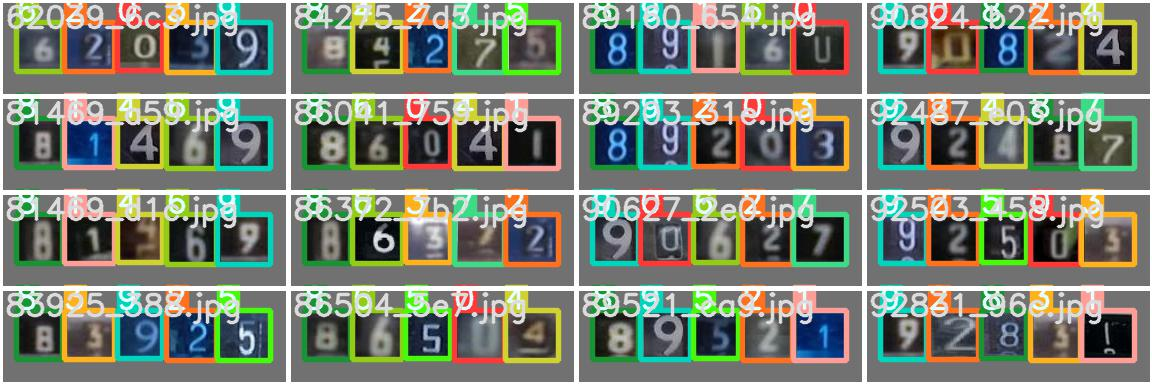

In [ ]:
# first, display our ground truth data
print("GROUND TRUTH TRAINING DATA:")
Image(filename='/content/gdrive/MyDrive/yolo5/runs/train/exp83/test_batch0_labels.jpg', width=900)

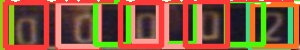

In [ ]:
#display inference on ALL test images
#this looks much better with longer training above

import glob
from IPython.display import Image, display

for imageName in glob.glob('/content/gdrive/MyDrive/yolo5/digit/result/exp10/012*.jpg'): #assuming JPG
    display(Image(filename=imageName))
    print("\n")

This will give you labels, coordinates, and thresholds for each object detected, you can use it to plot bounding boxes. You can check out this repo for more detailed code.



In [ ]:
files = glob. glob('/content/gdrive/MyDrive/yolo5/digit/result/exp10/*.jpg')

In [ ]:
clear_output()
print('environment %s %s' % (torch.__version__,torch.cuda.get_device_properties(0) if torch.cuda.is_available () else 'CPU'))

environment 1.9.0+cu102 CPU


### 展示图片列表

In [ ]:
# 显示指定目录下的图片
import glob
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
%matplotlib inline

def showImages(path, limit_n = 6):
 columns = 1
 images = []
 for img_path in glob.glob(path):
   images.append(mpimg.imread(img_path))

 plt.figure(figsize=(200,200))
 for i, image in enumerate(images):
   if(i > limit_n): break 
   plt.subplot(len(images) / columns + 1, columns, i + 1)
   plt.imshow(image)

## backup model

In [ ]:
cp /content/gdrive/MyDrive/yolo5/yolov5/runs/train/exp11/weights/*.pt /content/gdrive/MyDrive/yolo5/training

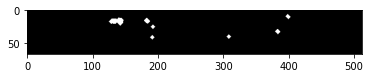

In [ ]:

import pylab as pl
import numpy as np
from scipy import ndimage
img = pl.imread("/content/gdrive/MyDrive/yolo5/digit/internet/00450000100541_0_997.jpg")[:, :, 0].astype(np.uint8)
img2 = ndimage.binary_erosion(img, iterations=40)
img3 = ndimage.binary_dilation(img2, iterations=40)
labels, n = ndimage.label(img3)
counts = np.bincount(labels.ravel())
counts[0] = 0
img4 = labels==np.argmax(counts)
img5 = ndimage.binary_fill_holes(img4)
result = ~img & img5
result = ndimage.binary_erosion(result, iterations=3)
result = ndimage.binary_dilation(result, iterations=3)
pl.imshow(result, cmap="gray")

## 查看效果

In [ ]:
folder = 'runs/train/exp17/*.jpg'
showImages(folder)

测试

In [ ]:
folder = 'runs/train/exp17/'

Image(filename = folder + 'test_batch0_labels.jpg', width=800)  # train batch 0 mosaics and labels
Image(filename = folder + 'test_batch0_pred.jpg', width=800)  # train batch 0 mosaics and labels


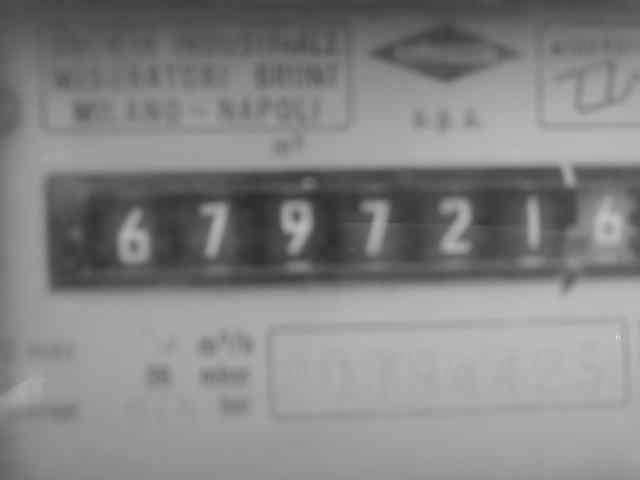

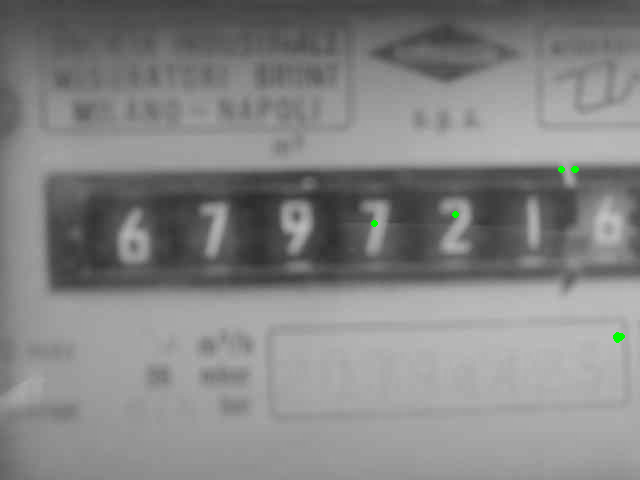

In [ ]:
import numpy as np
import cv2 as cv
from google.colab.patches import cv2_imshow


def harris(image, opt=1):
    # Detector parameters
    blockSize = 2
    apertureSize = 3
    k = 0.04
    # Detecting corners
    gray = cv.cvtColor(image, cv.COLOR_BGR2GRAY)
    dst = cv.cornerHarris(gray, blockSize, apertureSize, k)
    # Normalizing
    dst_norm = np.empty(dst.shape, dtype=np.float32)
    cv.normalize(dst, dst_norm, alpha=0, beta=255, norm_type=cv.NORM_MINMAX)

    # Drawing a circle around corners
    for i in range(dst_norm.shape[0]):
        for j in range(dst_norm.shape[1]):
            if int(dst_norm[i, j]) > 120:
                cv.circle(image, (j, i), 2, (0, 255, 0), 2)
    # output
    return image


src = cv.imread("/content/1.png")
cv2_imshow(src)
result = harris(src)
cv2_imshow( result)
cv.imwrite('result.jpg', result)
cv.waitKey(0)
cv.destroyAllWindows()